# <center><b>Logistic regression on Heart condition Dataset<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
  - **5.1** [**Missing value**](#Section51)
  - **5.2** [**Duplicate rows**](#Section52)
  - **5.3** [**Outliers**](#Section53)

**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **Heart** is an essential organ of living things.

- It is a kind of motor of the body which helps in **transporting oxygenated/deoxygenated blood**, **hormones** other **vital** substances, **body waste**, and maintaining **blood pressure**. 

- Keeping the heart healthy is one of the most priority things in life.

<center><img width=40% src="https://c.tenor.com/xwdyfom9q4AAAAAC/healthy-heart-heart.gif"></center>

- The case study considers a report collected from various people about their health and if they have heart conditions.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Keeping the heart healthy should be the most priority thing in life.
- Because of the tight schedule and hectic life, people are neglecting this.
- In a data science role I have been hired to analyse and create a model which can predict person will have **heart disease** or not.
- With help of this analysis person can be cautious and plan his routine health checkup.
- This would be a **leading step** to help the user to get their health right.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [1]:
!pip install -q datascience 
!pip install -q pandas-profiling

In [2]:
!pip install -q --upgrade pandas-profiling

In [3]:
!pip install --upgrade pandas

<a name = Section33></a>
### **3.2 Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                                # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import re

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the health condition of a person about his/her heartbeat, blood pressure, cholesterol and other values.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 918 | 12 | 86.2 KB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Age | Age of person |
|2| Sex | Sex of person  |
|3| Chest pain type |	The chest pain experienced (**TA**: typical angina, **ATA**: atypical angina, **NAP**: non-anginal pain, **ASY**: asymptomatic) |
|4| RestingBP |	Blood pressure of person while resting |
|5| Cholesterol |	The person's cholesterol measurement in mg/dl |
|6| FastingBS |	The person's fasting blood sugar (> 120 mg/dl, **1** = true; **0** = false) |
|7| RestingECG |	Resting electrocardiographic measurement (**normal**, **ST** wave abnormality, **LVH*** left ventricular hypertrophy by Estes' criteria)|
|8| MaxHR |	The person's maximum heart rate achieved|
|9| ExerciseAngina | Exercise induced angina (**1** = yes; **0** = no)|
|10| Oldpeak | Give information of old peak|
|11| ST_Slope | the slope of the peak exercise ST segment (**1**: upsloping, **2**: flat, **3**: downsloping)|
|12| HeartDisease | This is target variable (**0** = no, **1** = yes)|

In [5]:
ds_heart = pd.read_csv('heart.csv')
print('Data shape : ', ds_heart.shape)
ds_heart.head()

Data shape :  (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


### <a name = Section42></a>
### **4.1 Data Information**

- In this section, we will see the **information about the types of features**.

In [6]:
ds_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
ds_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


**Observations:**

- We can see there are total **918** records and **12** features.

- Feature **Heart Disease** will be used as the target variable where the model will predict person will have **Heart Disease** or not.
- There is no missing value in the given dataset.
- 28 is the minimum and 77 is the maximum age considered for the collection of testing reports.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Missing Value**

- For **quick analysis** will use pandas methods to find out missing values.

In [8]:
100*(ds_heart.shape[0]-ds_heart.count())/ds_heart.shape[0]

Age              0.00
Sex              0.00
ChestPainType    0.00
RestingBP        0.00
Cholesterol      0.00
FastingBS        0.00
RestingECG       0.00
MaxHR            0.00
ExerciseAngina   0.00
Oldpeak          0.00
ST_Slope         0.00
HeartDisease     0.00
dtype: float64

**Observations:**

- There is no missing value in given dataset.

<a name = Section52></a>
### **5.2 Duplicate rows**

- For **quick analysis** will use pandas methods to find out duplicates values.

In [9]:
ds_heart[ds_heart.duplicated()].shape

(0, 12)

**Observations:**

- There is no duplicate value in given dataset.

<a name = Section53></a>
### **5.3 Garbage value**

- For **quick analysis** will use pandas methods to find out garbage values.

In [10]:
ds_heart['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

**Observations:**

- There is no garbage value in the given dataset.
- Other records that are supposed to be it are int, a float is float and categorical are object type

<a name = Section53></a>
### **5.3 Outliers**

- For **quick analysis** will use pandas methods to find out outliers.

In [11]:
ds_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [12]:
ds_heart[ds_heart.RestingBP <80]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.50,Flat,1


**Observations:**

- We have one record as an outlier having a value of 0.
- We will replace this with the mean value. 

In [13]:
ds_heart[ds_heart.Cholesterol <85].shape

(172, 12)

**Observations:**

- We have a total of 172 records as 0 cholesterol which can be correctly entered data.
- We will ignore this record. 
- All other values seem to be ok. So we will move forward with data cleaning.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- As above anylisis only one outlier need to relplace by mean value.

In [14]:
ds_heart.loc[(ds_heart.RestingBP <= 79), 'RestingBP'] = ds_heart.mean()

In [15]:
ds_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,917.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.54,198.80,0.23,136.81,0.89,0.55
std,9.43,18.00,109.38,0.42,25.46,1.07,0.50
min,28.00,80.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


**Observations:**

- There is change in SD of blood pressure.

<a name = Section7></a>

---
# **7. Exploratory Data Analysis**
---

**<h3>Question:** What is the ratio of person having heard disease or not?</h3>

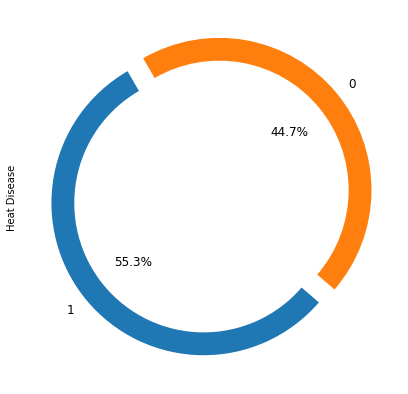

In [16]:
heat_disease = ['Yes', 'No']
ds_heart.HeartDisease.value_counts().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(2)/15,
                                                                figsize=(7, 7),
                                                                fontsize=12, 
                                                                startangle=120,
                                                                label='Heat Disease')
plt.show()

**Observations:**

- It is a **balanced** dataset.
- Around **55%** of people have heart disease.

**<h3>Question:** Age distribution in recorded data?</h3>

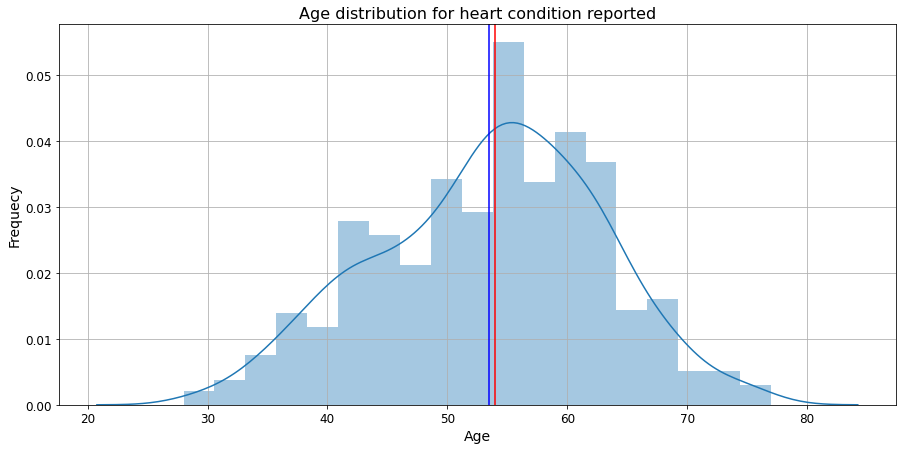

In [17]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_heart['Age'], kde=True)

# Add some cosmetics
plt.title(label='Age distribution for heart condition reported', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.axvline(ds_heart.Age.mean(), color = 'b')
plt.axvline(ds_heart.Age.median(), color = 'r')

# Display the plot
plt.show()

**Observations:**

- Between ages **50** to **65** most people have reported about their health.
- **Mean** and **median** are close to each other.
- Dataset is normally distributed.

**<h3>Question:** Age distribution in person having heart desease?</h3>

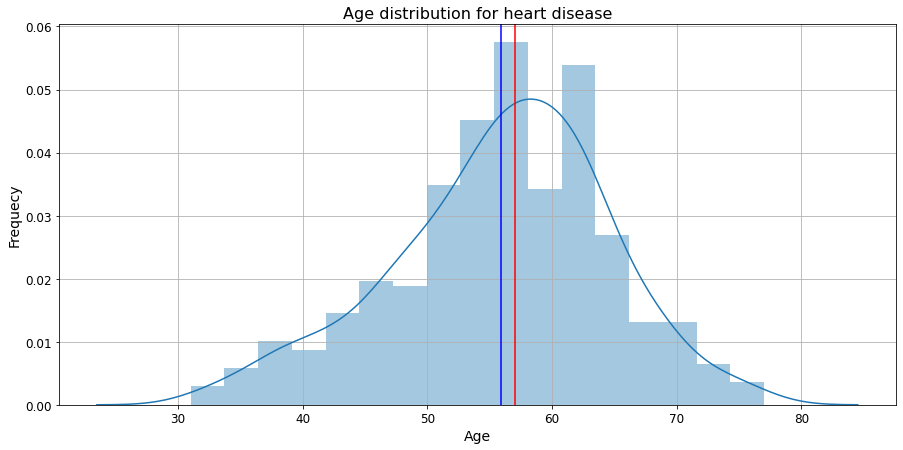

In [18]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_heart[ds_heart['HeartDisease'] == 1]['Age'], kde=True)

# Add some cosmetics
plt.title(label='Age distribution for heart disease', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.axvline(ds_heart[ds_heart['HeartDisease'] == 1].Age.mean(), color = 'b')
plt.axvline(ds_heart[ds_heart['HeartDisease'] == 1].Age.median(), color = 'r')
plt.grid(b=True)

# Display the plot
plt.show()

**Observations:**

- Between ages **50** **65** most people have heart disease.
- **Mean** and **median** are almost close to each other.
- There is a very small right-skewed.

**<h3>Question:** Sex ratio for total reported cases and person have heart disease?</h3>

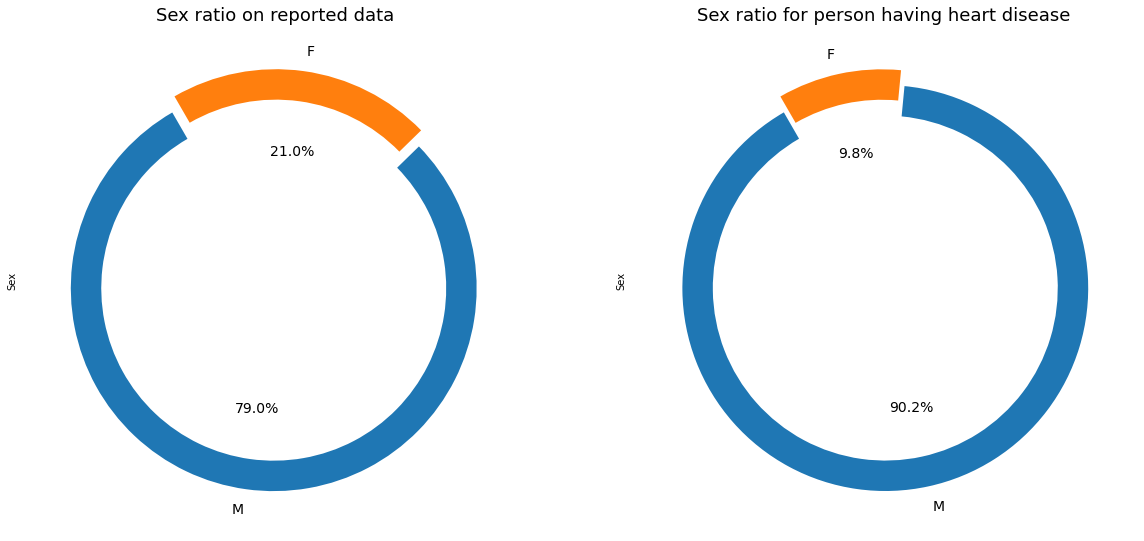

In [19]:
fig = plt.figure(figsize = [20,15])
plt.subplot(1,2,1)
ds_heart.Sex.value_counts().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(2)/25,
                                                                fontsize=14, 
                                                                startangle=120)
plt.title(label='Sex ratio on reported data', fontsize=18)

plt.subplot(1,2,2)
ds_heart[ds_heart['HeartDisease'] == 1].Sex.value_counts().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(2)/25,
                                                                fontsize=14, 
                                                                startangle=120)
plt.title(label='Sex ratio for person having heart disease', fontsize=18)
plt.show()

**Observations:**

- **70%** of reported cases are male.
- Ratio is not balanced.
- People who have heart diseases have **90%** male category.
- It might be the case that many females who are suffering from heart disease are not reporting it.

<a name = Section8></a>

---
# **8. Post Data Processing**
---



<a name = Section81></a>
### **8.1 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.
- We will also find correlations between independent variables.

In [20]:
ds_heart.fillna(ds_heart.mean(), inplace=True)

In [21]:
X = ds_heart.drop('HeartDisease', axis= 1)

In [22]:
y = ds_heart['HeartDisease']

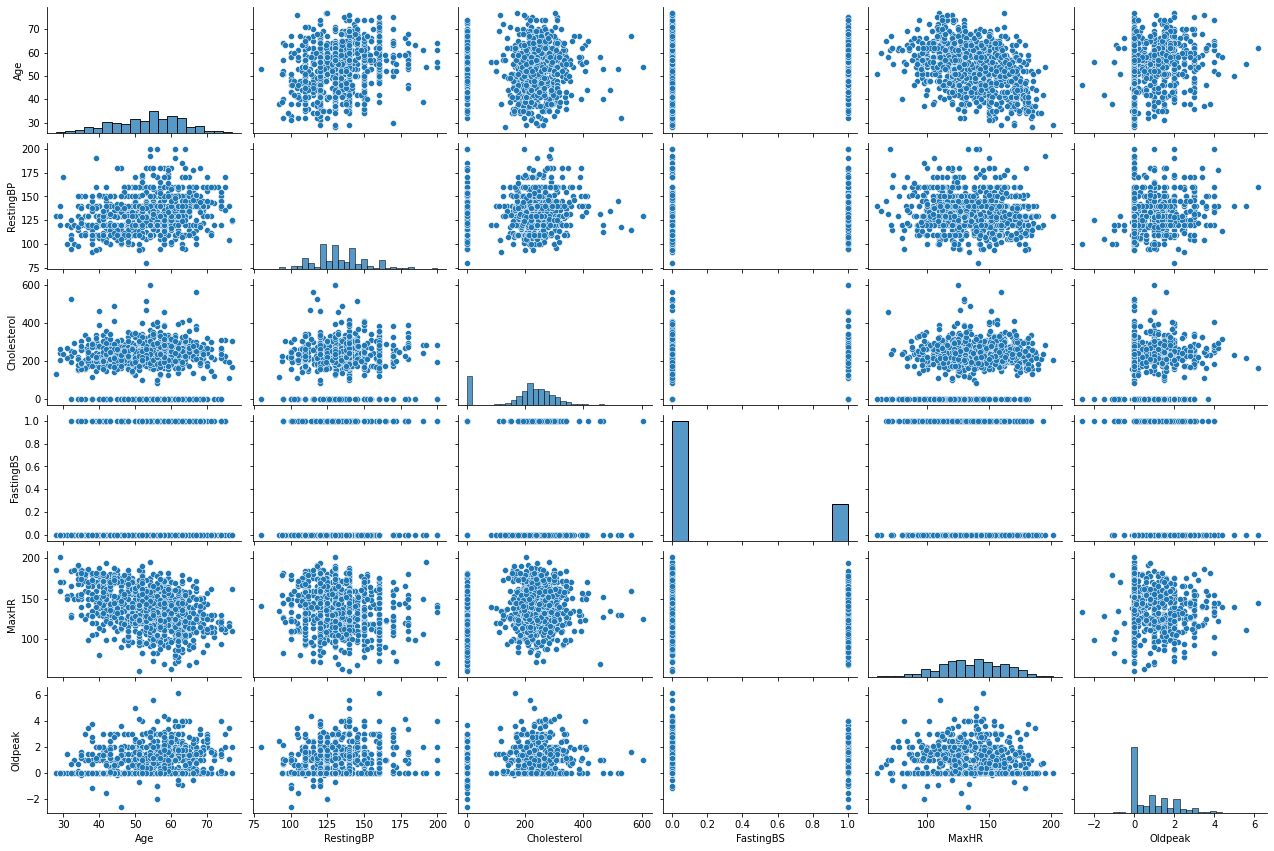

In [23]:
sns.pairplot(X, size = 2, aspect = 1.5)
plt.show()

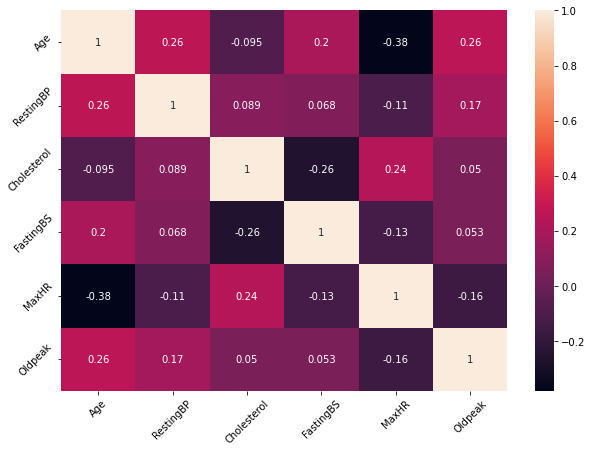

In [24]:
fig = plt.figure(figsize=(10, 7))
sns.heatmap(X.corr(), annot=True );
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

**Observations:**

- All features are not highly correlated.

- Some of features are negative correlated.

<a name = Section82></a>
### **8.2 One Hot encoding**

- Convert categorical variable into **dummy/indicator** variables.

In [25]:
X = pd.get_dummies(X, drop_first= True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.00,289,0,172,0.00,1,1,0,0,1,0,0,0,1
1,49,160.00,180,0,156,1.00,0,0,1,0,1,0,0,1,0
2,37,130.00,283,0,98,0.00,1,1,0,0,0,1,0,0,1
3,48,138.00,214,0,108,1.50,0,0,0,0,1,0,1,1,0
4,54,150.00,195,0,122,0.00,1,0,1,0,1,0,0,0,1


<a name = Section9></a>

---
# **9. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression and DecisionTreeClassifier model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **confusion matrix** on **accuracy**, **Precision** and **Recall** scores.

<a name = Section91></a>
### **9.1 Model Logistic Regression**

<a name = Section911></a>
### **9.1.1 Train test split**

- Train test split. Keeping 20% data in test data.

In [26]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=10)

In [27]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (734, 15)
y_train shape:  (734,)

Test cases as below
X_test shape:  (184, 15)
y_test shape:  (184,)


<a name = Section912></a>
### **9.1.2 Model creation**

- Model creation with default hyperparameter of **Logistic Regression**.

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### **Prediction of test data and train data to evaluate model**

In [29]:
y_pred_test = model.predict(X_test)

In [30]:
y_pred_train = model.predict(X_train)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix_1.index = ['Actual No','Actual Yes']
confusion_matrix_1.columns = ['Predicted No','Predicted Yes']
print(confusion_matrix_1)

            Predicted No  Predicted Yes
Actual No             70             16
Actual Yes            13             85


In [32]:
from sklearn.metrics import classification_report
target_names = ['No Heart Diseases', 'Yes Heart Diseases']
print(classification_report(y_test, y_pred_test, target_names= target_names))

                    precision    recall  f1-score   support

 No Heart Diseases       0.84      0.81      0.83        86
Yes Heart Diseases       0.84      0.87      0.85        98

          accuracy                           0.84       184
         macro avg       0.84      0.84      0.84       184
      weighted avg       0.84      0.84      0.84       184



In [33]:
print(classification_report(y_train, y_pred_train, target_names= target_names))

                    precision    recall  f1-score   support

 No Heart Diseases       0.88      0.84      0.86       324
Yes Heart Diseases       0.88      0.91      0.89       410

          accuracy                           0.88       734
         macro avg       0.88      0.87      0.88       734
      weighted avg       0.88      0.88      0.88       734



In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))

Accuracy score for test data is: 0.842391304347826
Accuracy score for train data is: 0.8773841961852861


In [35]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred_test)
print('Precision score for test data is:', precision)

Precision score for test data is: 0.8415841584158416


In [36]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred_test)
print('Recall score for test data is:', recall)

Recall score for test data is: 0.8673469387755102


**Observations**:

- As per the problem statement reducing False negatives is more important hence improving recall.
- Accuracy of **train** and **test** data are **88%** and **83%**.
- Model is towards **overfitting** and will try to improve.
- Recall of train and test is **91%** and **87%**.
- We definitely need to improve our model.

<a name = Section913></a>
### **9.1.3 Train test split**

- Train test split. Keeping 20% data in test data.

In [37]:
X_D = ds_heart.loc[:,ds_heart.columns != 'HeartDisease']

In [38]:
X_D_train, X_D_test, y_D_train, y_D_test=split(X_D,y)
print('Train cases as below')
print('X_train shape: ',X_D_train.shape)
print('y_train shape: ',X_D_test.shape)
print('\nTest cases as below')
print('X_test shape: ',y_D_train.shape)
print('y_test shape: ',y_D_test.shape)

Train cases as below
X_train shape:  (734, 11)
y_train shape:  (184, 11)

Test cases as below
X_test shape:  (734,)
y_test shape:  (184,)


<a name = Section914></a>
### **9.1.4 Label Encoding**

- Encode target labels with value between 0 and n_classes-1.

In [39]:
from sklearn import preprocessing
le = dict()
for column_name in X_D_train.columns:
        if X_D_train[column_name].dtype == object:
            le[column_name] = preprocessing.LabelEncoder()
            X_D_train[column_name] = le[column_name].fit_transform(X_D_train[column_name])
        else:
            pass

In [40]:
for column_name in X_D_test.columns:
        if X_D_test[column_name].dtype == object:
            X_D_test[column_name] = le[column_name].transform(X_D_test[column_name])
        else:
            pass

<a name = Section915></a>
### **9.1.5 Model creation**

- Model creation with default hyperparameter of **DecisionTreeClassifier**.

In [41]:
from sklearn.tree import DecisionTreeClassifier
model_d = DecisionTreeClassifier(random_state=5)

In [42]:
model_d.fit(X_D_train,y_D_train)

DecisionTreeClassifier(random_state=5)

#### **Prediction of test data and train data to evaluate model**

In [43]:
y_D_predict_train = model_d.predict(X_D_train)
y_D_predict_test = model_d.predict(X_D_test)

In [44]:
cm2 = pd.DataFrame(confusion_matrix(y_D_test, y_D_predict_test))

cm2.index = ['Actual No','Actual Yes']
cm2.columns = ['Predicted No','Predicted Yes']
cm2

,Predicted No,Predicted Yes
Actual No,67,19
Actual Yes,26,72


In [45]:
print(classification_report(y_D_test, y_D_predict_test, target_names= target_names))

                    precision    recall  f1-score   support

 No Heart Diseases       0.72      0.78      0.75        86
Yes Heart Diseases       0.79      0.73      0.76        98

          accuracy                           0.76       184
         macro avg       0.76      0.76      0.76       184
      weighted avg       0.76      0.76      0.76       184



In [46]:
print(classification_report(y_D_train, y_D_predict_train, target_names= target_names))

                    precision    recall  f1-score   support

 No Heart Diseases       1.00      1.00      1.00       324
Yes Heart Diseases       1.00      1.00      1.00       410

          accuracy                           1.00       734
         macro avg       1.00      1.00      1.00       734
      weighted avg       1.00      1.00      1.00       734



**Observations**:

- Model is working very well in **train** data.
- Model is not working very well on test data.
- It is a very much **overfitted** model.
- We will select the **LogisticRegression** model. 
- We will use other model techniques in future terms to increase the performance of the model.

<a name = Section10></a>

---
# **10. Summarization**
---

<a name = Section101></a>
### **10.1 Conclusion**

- DecisionTreeClassifier is known for overfitting, which is very evident in this dataset.

- We will use another model or hyperparameter to increase the performance of the model.